# SCIE1000/1100 Practical 10 - Semester 2, 2025 #

This practical focusses on the following material: 
- Science and modelling content from Lecture 10.


- Python from throughout the course.


- Communication building further on the principles that have been introduced.

Please review any course material you may have missed prior to the Practical.

**This practical contributes toward your final grade.  Practical grading is explained in the Practical exercises folder on Blackboard**

**Goals**:  Here we will develop our understanding of the concept of the area under a curve (AUC) and its applications. This will include using the trapezoid rule to calculate AUC.

The aim of the computing component of this practical is to consolidate your understanding of Python as applied to scientific contexts.
Support for these Python concepts is available: see Appendix A of the course notes, ask on the course discussion board, make use of lecturer office hours, or attend the Python Class.

In the communication component of this practical, we will continue to use the four principles for effective communication.


## Part 1: Warm-up activities (30 minutes) ##

#### Task 1.1: Communication ####

Watch the following advertising video: ['Nuromol'](https://www.youtube.com/watch?v=rGjhm3omHZw)

1. Who is the target audience for this advertisement?

2. What scientific content is used to convince the viewer?

3. Do you think this would be an effective approach to sell the product?



#### Task 1.2: Modelling ####

Consider the following statement:

*A function, when shown on a log-log plot, appears linear with a slope of 1.0 and a $y$-intercept of 3.5.*

Determine the equation for the function and describe its form.



## Part 2: Modelling with AUC (40 minutes) ##

#### Task 2.1: Salmonella ####

(This question was on the final examination in 2012.)

To reduce the risk of [_Salmonella_](https://en.wikipedia.org/wiki/Salmonellosis) infections, a company heats
egg custard tarts as follows.


>At time $t=0$ min, tarts have a temperature of 60 $^\circ$C. Their temperature
**increases** at a 
constant rate of 1 $^\circ$C min$^{-1}$ until reaching
70 $^\circ$C. They are held at this temperature for 30 minutes, 
then the temperature **decreases** at $0.2$ $^\circ$C min$^{-1}$ for 10 minutes, and
finally **decreases** at $0.8$ $^\circ$C min$^{-1}$ for 10 minutes. 

For all of this question, assume that _Salmonella_ is only killed by temperatures higher than 60 $^\circ$C.

The following Python program plots the temperature of the tarts **above the baseline of 60 $^\circ$C**; run the program now, then answer these questions:


   1. What does the area under the curve (AUC) of this graph represent and what are its units?


   2. Find the AUC of the graph. (Show all working.)


   3. In order for the egg custard tarts to be safe to consume, the AUC  must be at least 500, in the appropriate units. The only stage of the process that can be changed is the rate of initial heating. (That is, the process must last for a total of 60 minutes, the cooling rates must stay unchanged, and the maximum temperature must be maintained at 70 $^\circ$C.) Find the (constant) rate of initial heating from 60 $^\circ$C  to 70 $^\circ$C  that will give an overall AUC of exactly 500. 
   
   [**Hint**: Start by noting what the AUC is between 10 and 60 minutes; this will tell you the required area you are aiming to get between 0 and 10 minutes.  It will be useful to define $t_{70}$ to be the time at which the oven temperature reaches 70 $^\circ$C.]

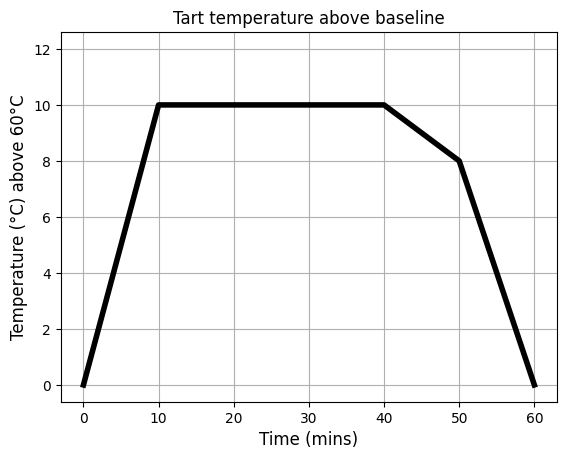

In [2]:
# Program to plot the temperature profile of an egg tart

import numpy as np
import matplotlib.pyplot as plt

t=np.array([0,10,40,50,60])
temp=np.array([0,10,10,8,0])
plt.xlabel("Time (mins)",fontsize="large")
plt.ylabel("Temperature (\u00B0C) above 60\u00B0C",fontsize="large")
plt.title("Tart temperature above baseline",fontsize="large")
plt.plot(t, temp, "k-", linewidth=4)
plt.plot([0,0],[0,12],linewidth=0)
plt.grid(True)
plt.show()

#### Task 2.2: Salmonella (continued) ####

(This question was on the final examination in 2012.) This task relates to the earlier task on Salmonella.

In the first stage of the heating process described in the earlier task, tarts were heated at a linear rate for the first 10 minutes. The following Python program plots the temperature of the tarts **above the baseline of 60 $^\circ$C** for the first
10 minutes, with the linear rate of heating shown as a dashed line. Assume that during the first 10 minutes the temperature instead follows the solid curve shown in the graph. Run the Python program now, then answer these questions using the graph:

   1. Find the equation of the new temperature from $t=0$ to $t=10$ mins. (Hint: during this time
the graph forms one quarter of a cycle of a sine wave with no phase shift.) **Note**: you could "cheat" this question by reading the program. However, that misses the point of the question, which is for you to try to find the equation by examining the graph. The program was not on the exam paper.


   2. **From the graph**, roughly estimate the 
area **between** the solid curve and the dashed line. (Hint: each
grid cell in the graph has an area of 4.)


   3. Using integration, it can be shown that the AUC of the
first quarter of a cycle of a sine wave with period $P$ and amplitude $A$ is equal to 
$\displaystyle\frac{AP}{2\pi}$. Use this to find the percentage error in your answer to Part 2.

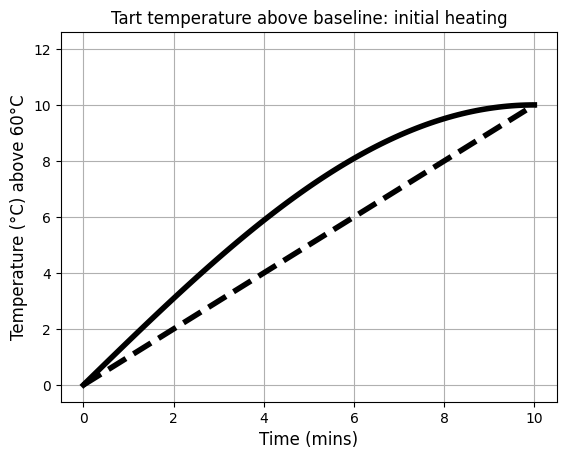

In [3]:
# Program to plot the temperature profile of an egg tart during the initial heating phase

import numpy as np
import matplotlib.pyplot as plt

t=np.array([0,10])
temp=np.array([0,10])
plt.xlabel("Time (mins)",fontsize="large")
plt.ylabel("Temperature (\u00B0C) above 60\u00B0C",fontsize="large")
plt.title("Tart temperature above baseline: initial heating",fontsize="large")
plt.plot(t, temp, "k--", linewidth=4)

t1=np.arange(0,10.05,0.1)
temp1=10*np.sin(2*np.pi*t1/40)
plt.plot(t1, temp1, "k-", linewidth=4)
plt.plot([0,0],[0,12],linewidth=0)
plt.grid(True)
plt.show()


## Part 3: Programming AUC (40 minutes) ##

#### Task 3.1: Morphine  ####

Suppose a patient was administered 6.5 mg of morphine and the following concentrations of morphine in their blood (in mg/L) were measured at the following times (in hours since the does was administered): 

time (hours) | Concentration (mg/L) 
:---:|:---:
0|	1.3 
2| 0.65
4| 0.32
6| 0.16
8| 0.08
10| 0.04




Write a program that plots the data from that table, and uses the trapezoid rule to calculate the area under that graph. You may paste the following skeleton program into the Python cell if you wish. Your program must define and use the function
$\texttt{AreaTrap}$, which returns the area of a trapezoid given the two heights and the width. **Comment your program appropriately.  Ensure that the output has the correct units and explains the meaning of the calculations.  Then show your program to your tutor**.

    import numpy as np
    import matplotlib.pyplot as plt
    
    def areaTrap(y1, y2, wid):
        # write this function to match the specifications described in the task
    
    totalTime = 10
    width = 2
    times = np.arange(0,12,2)
    concs = np.array([1.3, 0.65, 0.32, 0.16, 0.08, 0.04])

    plt.plot()
    plt.xlabel()
    plt.ylabel()
    plt.show()

    area = 0
    i = 0
    while i < np.size(concs)-1:
        # insert code here to perform the calculation
        i = i+1

    print("something useful here")

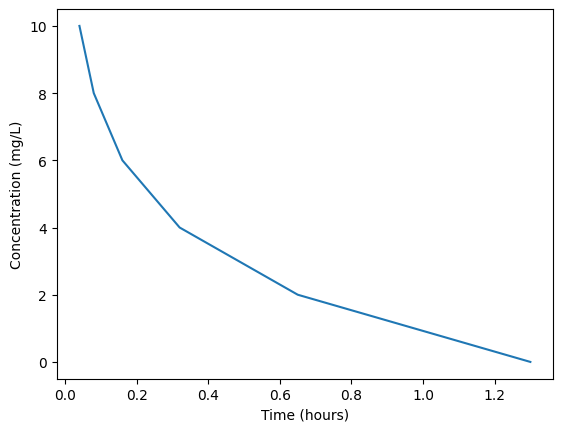

The area using the trapazoidal rule is: 3.13


In [16]:
# Paste the above skeleton program here and edit it to achieve its purpose

import numpy as np
import matplotlib.pyplot as plt

def areaTrap(y1, y2, wid):
    # write this function to match the specifications described in the task
    return wid * min(y1, y2) + 0.5 * wid * (max(y1, y2) - min(y2, y1))

totalTime = 10
width = 2
times = np.arange(0,12,2)
concs = np.array([1.3, 0.65, 0.32, 0.16, 0.08, 0.04])

plt.plot(concs, times)
plt.xlabel("Time (hours)")
plt.ylabel("Concentration (mg/L)")
plt.show()

area = 0
i = 0
while i < np.size(concs)-1:
    # insert code here to perform the calculation
    area = area + areaTrap(concs[i], concs[i+1], times[i])
    i = i+1

print(f"The area using the trapazoidal rule is: {area}")

## Part 4: Further problems ##

These problems are provided for further practice either during or after the practical.

#### Task 4.1: Area using rectangles ####

(This question was on the final examination in 2010.)

The concentration of a drug in an individual's blood is measured over a period of two hours, giving the values in the table. Use areas of (left) rectangles to estimate the area under the curve when the drug concentration is plotted against time, and briefly explain the physical meaning of the area.

Measured concentration (mmol L$^{-1})$ | 0 | 2 | 4 | 3 | 0 | 2 | 2 
:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:
Time (hours) | 0 | 0.1 | 0.5 | 1.2 | 1.4 | 1.7 | 2.0 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

conc = np.array([0,2,4,3,0,2,2])
time = np.array([0,0.1,0.5,1.2,1.4,1.7,2.0])

plt.plot(time, conc)
plt.xlabel("Time (hours)")
plt.ylabel("Measured concentration m mol/L")
plt.show()

area = 0
i = 0
while i < np.size(time):
    width = time[i+1] - time[i]
    leftHeight = conc[i]
    area = area + width * leftHeight
    i = i + 1
print(f"Area: {area}")

#### Task 4.2: Niger ####

(This question was on the final examination in 2013.)


The following information about the African country Niger is useful for answering this question (figures for years after 2010 are predictions).
$$$$

Year | 2010 | 2011 | 2015 | 2017 | 2020  
:---:|:---:|:---:|:---:|:---:|:---:
Total Nigerien population (millions) | 15.6 | 16.1 | 18.5 | 19.9 | 22.1 

$$$$
   1. Assume that the function $e(t) = 45+t^2$ models predicted annual per capita 
electricity consumption in Niger until the year 2020, in units of kWh,
where $t$ is the number of years since 2010.
Sketch a rough graph of $e(t)$.


   2. Use the function $e(t)$ from Part 1 and the population predictions 
for Niger to calculate the predicted **total** annual 
electricity consumption in Niger in the years 2010, 2011, 2015, 2017 and 2020.


   3. Plot the total annual electricity consumption values from Part 2 on
a set of axes. Include a title, appropriate values, and axis labels 
and units. Join consecutive pairs of points with a straight line.


   4. Find the units of the **gradient** of the graph you produced
in Part 3, and find the units of the **area under the curve** (AUC) of the graph.


   5. Calculate the **exact** AUC of the graph produced in Part 3. Show 
all working.

#### Task 4.3: Trichinosis ####

(This question was on the final examination in 2012.)

In order to be safe for human consumption, many foods need to be heated
sufficiently to kill bacteria. Typically, the effectiveness of the heating process is 
related to both the _temperature_ to which the food is raised, and the _time_ for
which the food maintains that temperature, with higher temperatures required for shorter periods
of time to have the same impact.

[_Trichinosis_](https://en.wikipedia.org/wiki/Trichinosis) is a parasitic disease caused by eating raw or 
undercooked meat, particularly pork, infected with the larvae of a species of 
roundworm, [_Trichinella spiralis_](https://en.wikipedia.org/wiki/Trichinella_spiralis). To help ensure that pork is safe 
for consumption, the United States Department of Agriculture has published the 
following table of times for which the internal temperature should be
maintained at the given levels.

Temp. ($^\circ$F) | Time (mins) | Temp. ($^\circ$F) | Time (mins)
:---:|:---:|:---:|:---:
120|	1260| 132|	15
122|	570 | 134|	6
124|	270 | 136|	3
126|	120 | 138|	2
128|	60  | 140|	1
130|	30  | 142|	1


Develop a mathematical model of the time $t$ in minutes for which the 
internal temperature of pork should be maintained at a temperature of $f$ 
$^\circ$F. Show all
working and explain your answer briefly. (**Hint:** your answer should be of the form $t(f)=\ldots.$)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def fahrenheit_to_celsius(fahrenheit):
  """
  Converts a temperature from Fahrenheit to Celsius.

  Args:
    fahrenheit: The temperature in Fahrenheit (float or int).

  Returns:
    The equivalent temperature in Celsius (float).
  """
  celsius = (fahrenheit - 32) * 5 / 9
  return celsius

np.plot(